Hotel Price Analysis – Delhi
Goal: Understand hotel pricing patterns and prepare data for ML models.


In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv("delhi.csv")

In [3]:
df.shape

(101, 10)

In [4]:
df.head() #top 5 rows 

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,"Country Inn and Suites by Radisson, Sahibabad",4.2,Very Good,15697,5.0,In Ghaziabad,Delhi city centre,30.0 km,"6,249",NaN
1,Radisson Blu Kaushambi Delhi NCR,4.0,Very Good,1826,5.0,In Ghaziabad,Delhi city centre,28.0 km,"5,039",605
2,The Ashok,3.8,Very Good,5694,5.0,Chanakyapuri,T1 - Delhi Airport (IGI Airport),9.8 km,"6,288",NaN
3,Pride Plaza Hotel Aerocity New Delhi,4.0,Very Good,7275,5.0,Aerocity,Indira Gandhi International Airport,4.0 km,"6,499",780
4,"Golden Tulip Vasundhara Hotel & Suites, Delhi NCR",3.9,Very Good,2057,4.0,In Ghaziabad,Delhi city centre,31.0 km,"3,386",871


In [5]:
df.sample(5) #five random rows

,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
51,Crowne Plaza Okhla,4.3,Excellent,2802,5.0,Okhla Industrial Area,NaN,NaN,"6,300",NaN
74,Svelte Hotel & Personal Suites,3.6,Very Good,967,5.0,Saket,NaN,NaN,"8,333",NaN
4,"Golden Tulip Vasundhara Hotel & Suites, Delhi NCR",3.9,Very Good,2057,4.0,In Ghaziabad,Delhi city centre,31.0 km,"3,386",871
9,The Hosteller Delhi | Private Rooms & Dorms,4.3,Excellent,795,NaN,New Friends Colony,NaN,NaN,"2,228",503
89,The Claridges New Delhi,4.1,Very Good,1055,5.0,Motilal Nehru Marg Area,India Gate,2.2 km,"10,350","1,863"


In [6]:
df.dtypes

Hotel Name               object
Rating                  float64
Rating Description       object
Reviews                   int64
Star Rating             float64
Location                 object
Nearest Landmark         object
Distance to Landmark     object
Price                    object
Tax                      object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            101 non-null    object 
 1   Rating                101 non-null    float64
 2   Rating Description    101 non-null    object 
 3   Reviews               101 non-null    int64  
 4   Star Rating           89 non-null     float64
 5   Location              101 non-null    object 
 6   Nearest Landmark      65 non-null     object 
 7   Distance to Landmark  65 non-null     object 
 8   Price                 101 non-null    object 
 9   Tax                   63 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 8.0+ KB


In [8]:
df.isnull().sum()

Hotel Name               0
Rating                   0
Rating Description       0
Reviews                  0
Star Rating             12
Location                 0
Nearest Landmark        36
Distance to Landmark    36
Price                    0
Tax                     38
dtype: int64

In [9]:
df.describe() #mathematical metrics on numerical columns

,Rating,Reviews,Star Rating
count,101.000000,101.000000,89.000000
mean,3.929703,3180.475248,4.280899
std,0.403372,3019.763903,0.797564
min,2.300000,3.000000,3.000000
25%,3.700000,1202.000000,4.000000
50%,4.000000,2047.000000,4.000000
75%,4.200000,4049.000000,5.000000
max,4.500000,15697.000000,5.000000


In [10]:
df.duplicated().sum() #no duplicate rows if present drop those rows 

np.int64(0)

In [11]:
#correlation check 
df.corr(numeric_only=True)

,Rating,Reviews,Star Rating
Rating,1.000000,0.228546,0.391765
Reviews,0.228546,1.000000,0.055531
Star Rating,0.391765,0.055531,1.000000


In [12]:
import seaborn as sns 

<Axes: xlabel='Rating', ylabel='Reviews'>

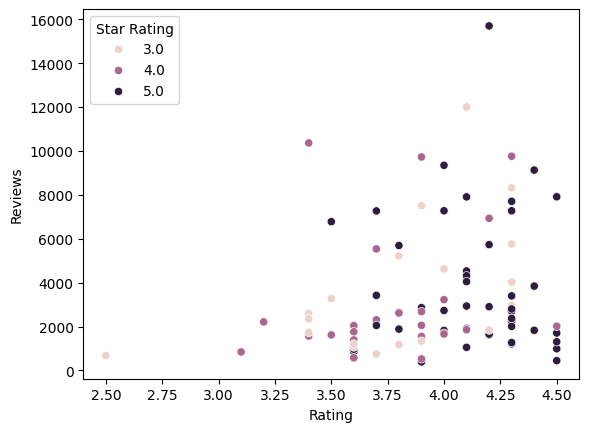

In [13]:
sns.scatterplot(data=df,x=df['Rating'],y=df['Reviews'],hue=df['Star Rating'])

<Axes: xlabel='Rating', ylabel='Reviews'>

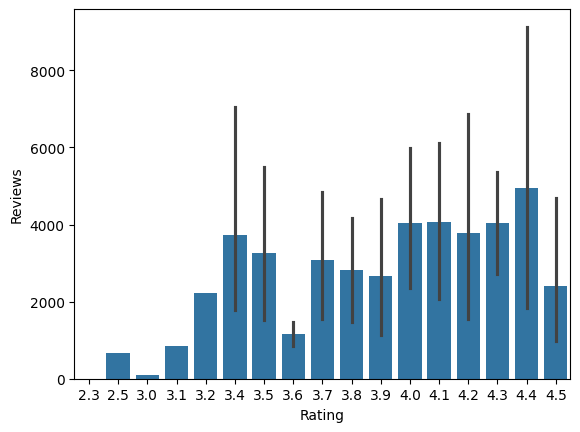

In [14]:
sns.barplot(data=df,x=df['Rating'],y=df['Reviews'])

In [15]:
df_clean=df.copy()

In [16]:
df_clean['Price'
]=(df_clean['Price'].str.replace(',','',regex=False).astype(float))

In [17]:
def convert_distance(value):
    if pd.isna(value):
       return np.nan

    value=value.strip().lower()
    if 'km' in value:
        return float(value.replace(' km',''))
    elif 'm' in value:
        return float(value.replace(' m',''))/1000
    else:
        return np.nan
       


                          
                           

In [18]:
df_clean['Distance to Landmark'] = df_clean['Distance to Landmark'].apply(convert_distance)


In [19]:
df_clean['Distance to Landmark'].head()
df_clean['Distance to Landmark'].describe()


count    65.000000
mean      5.622154
std       6.408582
min       0.310000
25%       2.200000
50%       4.200000
75%       6.500000
max      31.000000
Name: Distance to Landmark, dtype: float64

In [20]:
df_clean['Tax']=pd.to_numeric(df_clean['Tax'],errors='coerce')

In [21]:
df_clean.dtypes

Hotel Name               object
Rating                  float64
Rating Description       object
Reviews                   int64
Star Rating             float64
Location                 object
Nearest Landmark         object
Distance to Landmark    float64
Price                   float64
Tax                     float64
dtype: object

In [22]:
df_clean.columns


Index(['Hotel Name', 'Rating', 'Rating Description', 'Reviews', 'Star Rating',
       'Location', 'Nearest Landmark', 'Distance to Landmark', 'Price', 'Tax'],
      dtype='object')

In [23]:
df_clean['Rating Description'].value_counts()


Rating Description
Very Good    66
Excellent    25
Good          8
Average       2
Name: count, dtype: int64

In [24]:
rating_map = {
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}


In [25]:
df_clean['Rating_Desc_Encoded'] = (
    df_clean['Rating Description']
    .map(rating_map)
)


In [26]:
df_clean[['Rating Description', 'Rating_Desc_Encoded']].head(10)


,Rating Description,Rating_Desc_Encoded
0,Very Good,4
1,Very Good,4
2,Very Good,4
3,Very Good,4
4,Very Good,4
5,Very Good,4
6,Very Good,4
7,Very Good,4
8,Very Good,4
9,Excellent,5


In [27]:
df_clean.columns


Index(['Hotel Name', 'Rating', 'Rating Description', 'Reviews', 'Star Rating',
       'Location', 'Nearest Landmark', 'Distance to Landmark', 'Price', 'Tax',
       'Rating_Desc_Encoded'],
      dtype='object')

In [28]:
df_clean = pd.get_dummies(
    df_clean,
    columns=['Location'],
    drop_first=True
)


In [29]:
df_clean.filter(like='Location_').head()


,Location_Andrews Ganj,Location_Chanakyapuri,Location_Chandni Chowk,Location_Connaught Place,Location_Connaught Place,Location_Delhi,Location_Delhi Airport,Location_East Delhi,Location_East Of Kailash,Location_In Ghaziabad,...,Location_Rajouri Garden,Location_Rohini,Location_Safdarjung Enclave,Location_Saket,Location_Samalka,Location_Sector 10 Dwarka,Location_Sector 13 Dwarka,Location_Sector 21 Dwarka,Location_Vasant Kunj,Location_Vasant Vihar
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [30]:
df_model = df_clean.drop(
    columns=[
        'Hotel Name',          # identifier
        'Rating Description',  # already encoded
        'Nearest Landmark'     # too many unique values
    ]
)
abs

<function abs(x, /)>

In [31]:
df_model.dtypes


Rating                               float64
Reviews                                int64
Star Rating                          float64
Distance to Landmark                 float64
Price                                float64
Tax                                  float64
Rating_Desc_Encoded                    int64
Location_Andrews Ganj                   bool
Location_Chanakyapuri                   bool
Location_Chandni Chowk                  bool
Location_Connaught Place                bool
Location_Connaught Place                bool
Location_Delhi                          bool
Location_Delhi Airport                  bool
Location_East Delhi                     bool
Location_East Of Kailash                bool
Location_In Ghaziabad                   bool
Location_Janakpuri                      bool
Location_Karol bagh                     bool
Location_Mahipalpur                     bool
Location_Malviya Nagar                  bool
Location_Man Singh Road Area            bool
Location_M

In [32]:
bool_cols = df_model.select_dtypes(include='bool').columns
df_model[bool_cols] = df_model[bool_cols].astype(int)


In [33]:
df_model.dtypes


Rating                               float64
Reviews                                int64
Star Rating                          float64
Distance to Landmark                 float64
Price                                float64
Tax                                  float64
Rating_Desc_Encoded                    int64
Location_Andrews Ganj                  int64
Location_Chanakyapuri                  int64
Location_Chandni Chowk                 int64
Location_Connaught Place               int64
Location_Connaught Place               int64
Location_Delhi                         int64
Location_Delhi Airport                 int64
Location_East Delhi                    int64
Location_East Of Kailash               int64
Location_In Ghaziabad                  int64
Location_Janakpuri                     int64
Location_Karol bagh                    int64
Location_Mahipalpur                    int64
Location_Malviya Nagar                 int64
Location_Man Singh Road Area           int64
Location_M

In [34]:
df_model.head()

,Rating,Reviews,Star Rating,Distance to Landmark,Price,Tax,Rating_Desc_Encoded,Location_Andrews Ganj,Location_Chanakyapuri,Location_Chandni Chowk,...,Location_Rajouri Garden,Location_Rohini,Location_Safdarjung Enclave,Location_Saket,Location_Samalka,Location_Sector 10 Dwarka,Location_Sector 13 Dwarka,Location_Sector 21 Dwarka,Location_Vasant Kunj,Location_Vasant Vihar
0,4.2,15697,5.0,30.0,6249.0,NaN,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1826,5.0,28.0,5039.0,605.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,5694,5.0,9.8,6288.0,NaN,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,7275,5.0,4.0,6499.0,780.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.9,2057,4.0,31.0,3386.0,871.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_model

,Rating,Reviews,Star Rating,Distance to Landmark,Price,Tax,Rating_Desc_Encoded,Location_Andrews Ganj,Location_Chanakyapuri,Location_Chandni Chowk,...,Location_Rajouri Garden,Location_Rohini,Location_Safdarjung Enclave,Location_Saket,Location_Samalka,Location_Sector 10 Dwarka,Location_Sector 13 Dwarka,Location_Sector 21 Dwarka,Location_Vasant Kunj,Location_Vasant Vihar
0,4.2,15697,5.0,30.0,6249.0,NaN,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1826,5.0,28.0,5039.0,605.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,5694,5.0,9.8,6288.0,NaN,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,7275,5.0,4.0,6499.0,780.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.9,2057,4.0,31.0,3386.0,871.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3.4,1725,3.0,NaN,2799.0,572.0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,4.1,1856,4.0,NaN,6999.0,NaN,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
98,3.6,1207,3.0,0.7,3134.0,682.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,3.6,1764,4.0,NaN,3438.0,702.0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Observation:
Most hotels are concentrated in the mid-price range, with a few high-priced luxury hotels acting as outliers.


In [36]:
num_cols = df_model.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['Rating', 'Reviews', 'Star Rating', 'Distance to Landmark', 'Price',
       'Tax', 'Rating_Desc_Encoded', 'Location_Andrews Ganj',
       'Location_Chanakyapuri ', 'Location_Chandni Chowk ',
       'Location_Connaught Place', 'Location_Connaught Place ',
       'Location_Delhi ', 'Location_Delhi Airport ', 'Location_East Delhi',
       'Location_East Of Kailash', 'Location_In Ghaziabad ',
       'Location_Janakpuri', 'Location_Karol bagh', 'Location_Mahipalpur ',
       'Location_Malviya Nagar', 'Location_Man Singh Road Area ',
       'Location_Mangolpuri', 'Location_Motilal Nehru Marg Area ',
       'Location_Near Nehru Place', 'Location_New Friends Colony',
       'Location_North Delhi', 'Location_Okhla Industrial Area',
       'Location_Paharganj', 'Location_Paharganj ', 'Location_Pusa road ',
       'Location_R.K. Puram ', 'Location_Rajouri Garden', 'Location_Rohini',
       'Location_Safdarjung Enclave ', 'Location_Saket', 'Location_Samalka ',
       'Location_Sector 10 Dwa

In [37]:
outlier_summary = {}

for col in num_cols:
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_summary[col] = df_model[(df_model[col] < lower) | (df_model[col] > upper)].shape[0]

outlier_summary


{'Rating': 2,
 'Reviews': 8,
 'Star Rating': 0,
 'Distance to Landmark': 4,
 'Price': 1,
 'Tax': 0,
 'Rating_Desc_Encoded': 35,
 'Location_Andrews Ganj': 1,
 'Location_Chanakyapuri ': 5,
 'Location_Chandni Chowk ': 1,
 'Location_Connaught Place': 3,
 'Location_Connaught Place ': 10,
 'Location_Delhi ': 1,
 'Location_Delhi Airport ': 1,
 'Location_East Delhi': 8,
 'Location_East Of Kailash': 1,
 'Location_In Ghaziabad ': 4,
 'Location_Janakpuri': 1,
 'Location_Karol bagh': 1,
 'Location_Mahipalpur ': 18,
 'Location_Malviya Nagar': 1,
 'Location_Man Singh Road Area ': 1,
 'Location_Mangolpuri': 1,
 'Location_Motilal Nehru Marg Area ': 1,
 'Location_Near Nehru Place': 2,
 'Location_New Friends Colony': 2,
 'Location_North Delhi': 5,
 'Location_Okhla Industrial Area': 1,
 'Location_Paharganj': 1,
 'Location_Paharganj ': 5,
 'Location_Pusa road ': 1,
 'Location_R.K. Puram ': 1,
 'Location_Rajouri Garden': 1,
 'Location_Rohini': 1,
 'Location_Safdarjung Enclave ': 1,
 'Location_Saket': 3,
 '

In [38]:
df_out = df_model.copy()

for col in num_cols:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_out[col] = df_out[col].clip(lower, upper)


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model_std = df_out.copy()

df_model_std[num_cols] = scaler.fit_transform(df_out[num_cols])


In [40]:
df_model_std.to_csv("delhi_hotels_df_model_standardized.csv", index=False)
